<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from collections import defaultdict
from functools import reduce

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'sales.csv',
 'ecommerce-data.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 '1_orders_dataset.csv',
 'match_result_test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'test.csv',
 'scanner_data.csv',
 'groceries.csv',
 '1_order_payments_dataset.csv',
 'sample_data']

In [3]:
df = pd.read_csv('sales.csv')
df.head()

,id,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,1,4187,PG2,498,420.76,569.91,13,58
1,2,4195,PG2,473,545.64,712.41,16,58
2,3,4204,PG2,968,640.42,854.91,22,88
3,4,4219,PG2,241,869.69,1034.55,14,45
4,5,4718,PG2,1401,12.54,26.59,50,285


In [5]:
df['product_group'].value_counts().reset_index()

,index,product_group
0,PG4,349
1,PG5,255
2,PG6,243
3,PG2,75
4,PG3,39
5,PG1,39


In [11]:
cnt = df.groupby(['product_group'])['cost', 'last_week_sales', 'last_month_sales'].sum().reset_index()
cnt['week_rev'] = cnt.cost * cnt.last_week_sales
cnt['month_rev'] = cnt.cost * cnt.last_month_sales
cnt = cnt.reindex(['product_group', 'week_rev', 'month_rev'], axis = 1,)
cnt['ratio'] = round(cnt['week_rev']/cnt['month_rev']*100,2)
cnt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,product_group,week_rev,month_rev,ratio
0,PG1,1.107825e+07,3.842918e+07,28.83
1,PG2,3.772102e+07,1.466279e+08,25.73
2,PG3,8.646343e+06,3.334571e+07,25.93
3,PG4,1.003073e+08,3.518748e+08,28.51
4,PG5,3.724672e+08,1.380849e+09,26.97


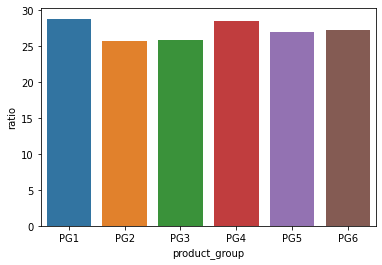

In [12]:
sns.barplot(data = cnt, x = 'product_group', y = 'ratio')

In [13]:
os.listdir()

['.config',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'sales.csv',
 'ecommerce-data.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 '1_orders_dataset.csv',
 'match_result_test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'test.csv',
 'scanner_data.csv',
 'groceries.csv',
 '1_order_payments_dataset.csv',
 'sample_data']

In [17]:
df = pd.read_csv('mock_sales_data.csv')
df.columns = [a.lower() for a in df.columns]
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df.head()

,date,price,salesqty
0,2021-01-04,122.0,1433.0
1,2021-01-05,118.6,977.0
2,2021-01-06,125.0,1551.0
3,2021-01-07,115.2,1096.0
4,2021-01-08,118.1,1052.0


In [20]:
df['rev'] = df.price * df.salesqty
df.index = df['date']
df.head()

,date,price,salesqty,rev
date,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0
2021-01-05,2021-01-05,118.6,977.0,115872.2
2021-01-06,2021-01-06,125.0,1551.0,193875.0
2021-01-07,2021-01-07,115.2,1096.0,126259.2
2021-01-08,2021-01-08,118.1,1052.0,124241.2


In [25]:
df['roll'] = df['rev'].rolling(window = 30).mean()
df.head()

,date,price,salesqty,rev,roll
date,,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0,NaN
2021-01-05,2021-01-05,118.6,977.0,115872.2,NaN
2021-01-06,2021-01-06,125.0,1551.0,193875.0,NaN
2021-01-07,2021-01-07,115.2,1096.0,126259.2,NaN
2021-01-08,2021-01-08,118.1,1052.0,124241.2,NaN


In [26]:
cnt2 = pd.melt(df, id_vars = ['date', 'price', 'salesqty'], var_name = 'type')
cnt2.head()

,date,price,salesqty,type,value
0,2021-01-04,122.0,1433.0,rev,174826.0
1,2021-01-05,118.6,977.0,rev,115872.2
2,2021-01-06,125.0,1551.0,rev,193875.0
3,2021-01-07,115.2,1096.0,rev,126259.2
4,2021-01-08,118.1,1052.0,rev,124241.2


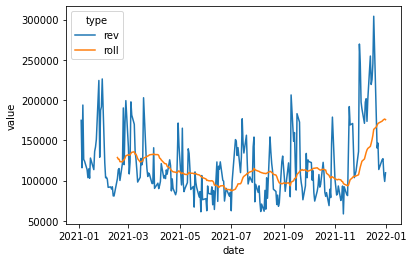

In [27]:
sns.lineplot(data = cnt2, x = 'date', y = 'value', hue = 'type')

In [31]:
df = df.drop(['roll'], axis = 1)
df.index = range(len(df))
df.head()

,date,price,salesqty,rev
0,2021-01-04,122.0,1433.0,174826.0
1,2021-01-05,118.6,977.0,115872.2
2,2021-01-06,125.0,1551.0,193875.0
3,2021-01-07,115.2,1096.0,126259.2
4,2021-01-08,118.1,1052.0,124241.2


In [32]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,date,price,salesqty,rev,month
0,2021-01-04,122.0,1433.0,174826.0,2021-01-01
1,2021-01-05,118.6,977.0,115872.2,2021-01-01
2,2021-01-06,125.0,1551.0,193875.0,2021-01-01
3,2021-01-07,115.2,1096.0,126259.2,2021-01-01
4,2021-01-08,118.1,1052.0,124241.2,2021-01-01


In [33]:
cnt3 = df.groupby(['month'])['rev'].sum().reset_index()
cnt3.head()

,month,rev
0,2021-01-01,2798915.0
1,2021-02-01,2192160.5
2,2021-03-01,2977435.2
3,2021-04-01,2257781.2
4,2021-05-01,1976450.8


In [39]:
cnt3 = cnt3.assign(rev_lag = cnt3['rev'].shift(1),
            diff = cnt3['rev'] - cnt3['rev'].shift(1),
            mom = round((cnt3['rev'] - cnt3['rev'].shift(1))/cnt3['rev'].shift(1)*100,2)
            )
cnt3.head()

,month,rev,rev_lag,diff,mom
0,2021-01-01,2798915.0,NaN,NaN,NaN
1,2021-02-01,2192160.5,2798915.0,-606754.5,-21.68
2,2021-03-01,2977435.2,2192160.5,785274.7,35.82
3,2021-04-01,2257781.2,2977435.2,-719654.0,-24.17
4,2021-05-01,1976450.8,2257781.2,-281330.4,-12.46


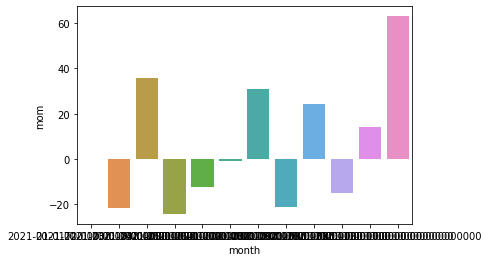

In [40]:
sns.barplot(data = cnt3, x = 'month', y = 'mom')

In [50]:
cnt4 = df.assign(rev_acc = df.groupby(['month'])['rev'].cumsum(),
                 days = (df['date'] - df['month']).dt.days
                 )
cnt4['month'] = cnt4['month'].astype(str)
cnt4.head()

,date,price,salesqty,rev,month,rev_acc,days
0,2021-01-04,122.0,1433.0,174826.0,2021-01-01,174826.0,3
1,2021-01-05,118.6,977.0,115872.2,2021-01-01,290698.2,4
2,2021-01-06,125.0,1551.0,193875.0,2021-01-01,484573.2,5
3,2021-01-07,115.2,1096.0,126259.2,2021-01-01,610832.4,6
4,2021-01-08,118.1,1052.0,124241.2,2021-01-01,735073.6,7


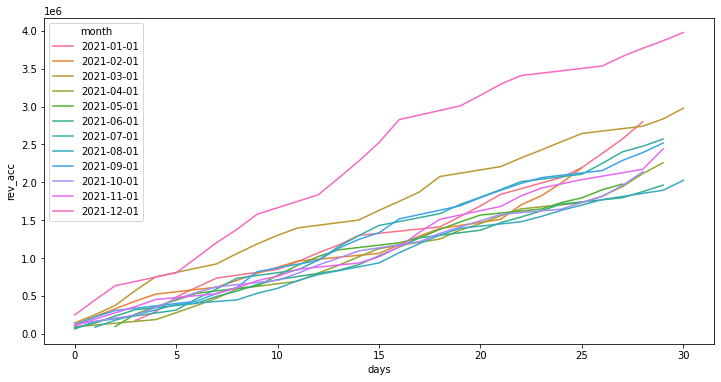

In [52]:
plt.figure(figsize = [12, 6])
sns.lineplot(data = cnt4, x = 'days', y = 'rev_acc', hue = 'month')

# Iterator

In [53]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [54]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [55]:
reduce(lambda x, y : x + y['age'], users, 0)

227

In [57]:
reduce(lambda x, y : x + [y['age']], users, [])

[73, 29, 51, 32, 42]